### Auther : Hicran Arnold <br> stroke_prediction

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline#???
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,plot_roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif

reading and saving the document

In [73]:
data_heart = pd.read_csv("heart.csv")
print("onservation size: ", len(data_heart))
print(data_heart.head())

onservation size:  918
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


checking to see if any null values

In [ ]:
 print(data.isnull().sum())

In [ ]:
print(data.dtypes)

we will work on the train data set 
we will split our data set to two ( one with the Heart Disease and with no heart disease to compare them)
first we will examine the numeric data and then not numeric data

In [ ]:
numeric= ["Age", "RestingBP","Cholesterol", "Oldpeak" , "MaxHR", "HeartDisease"]
g = sns.PairGrid(data.loc[ : ,numeric], hue="HeartDisease")
g.map_diag(sns.histplot, multiple="stack", element="step", color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
#data.insert(11,"class",["heart_disease" if val == 1 else "normal" for val in data["HeartDisease"]],True )

In [ ]:


#sns.catplot(y="RestingECG", hue="class", kind="count",
#            palette="pastel", edgecolor=".6",
#            data=data)

In [ ]:

#sns.catplot( x="ChestPainType" y="HeartDisease", hue="HeartDisease",
#kind="count", data=data)

#sns.catplot(x="ChestPainType", kind="count",hue="class", data=data)


Majority of heart deasiase patient have ASY

In [ ]:
#sns.catplot(x="Oldpeak", y="class", hue="HeartDisease",kind="violin", bw=.15, cut=0, data=data)

In [ ]:
#sns.catplot(y="ST_Slope", hue="class", kind="count",palette="pastel", edgecolor=".6",data=data)

In [ ]:
#sns.catplot(x="class", y="Oldpeak", hue="HeartDisease",kind="box", dodge=False, data=data)

 ### ------------ Creating Logistic Regression Model ------------------------

we have categorical data and we need to clean the data so we need to transform data so we can implement logistic regression

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV




x = data.iloc[ : , :12]
print("**** x ***")
print(x)
y=data.loc[ : ,"HeartDisease"]
print("**** y***")
print(y)
# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']

In [ ]:
numeric_features = ["Age", "RestingBP", "Cholesterol","FastingBS" , "MaxHR", "Oldpeak"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)



# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)




In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x, y, 
                                                  test_size=0.5,
                                                  random_state=11, 
                                                  stratify=y, shuffle=True)


clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print("model score: %.3f" % clf.score(x_test, y_test))


In [ ]:
cm = confusion_matrix(y_test, y_predict)

In [ ]:
TN, FP, FN, TP =cm.ravel()
print((TN, FP, FN, TP))
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
my_accuracy_score = accuracy_score(y_test, y_predict)
TPR= TP/(TP + FN)
TNR = TN/(TN + FP)
my_matrix_values = {"TN":TN, "FP":FP, "FN":FN, "TP":TP,"Accuracy": my_accuracy_score,"TPR":TPR,"TNR":TNR}
datframe = pd.DataFrame(my_matrix_values , index=[0])
print(datframe)
#display(my_matrix_values)

In [ ]:
my_list = data.dtypes
print(my_list)
print("length", len(my_list))

    Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
**** x ***
     Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0        0      1                  0                  1                  0   
1        1      0                  0                  0                  1   
2        0      1                  0           

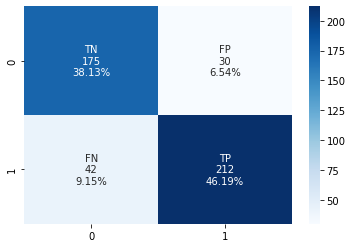

In [33]:
# https://scikit-learn.org/stable/modules/feature_selection.html
#https://github.com/Pitsillides91/Python-Tutorials/blob/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Introduction%20to%20Machine%20Learning%20-%20Logistic%20Regression%20Example%20(Titles%20Only).ipynb
# https://www.youtube.com/watch?v=NPdn3YPkg9w
my_data = data_heart[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]]
numeric_data  = data_heart[["Age", "RestingBP", "Cholesterol","FastingBS" , "MaxHR", "Oldpeak"]]
print(my_data)
dfBinary = pd.get_dummies(my_data)
#print(dfBinary)

frames = [dfBinary,numeric_data ]
df_binary = pd.concat(frames, axis=1)
#print( list(df_binary.columns))

x_new = df_binary.iloc[ : , :13]
print("**** x ***")
print(x_new)
y_new = data_heart.loc[ : ,"HeartDisease"]
print("**** y***")
print(y_new)

# splitting
x_train_bd,x_test_bd,y_train_bd, y_test_bd = train_test_split(x_new, y_new, 
                                                  test_size=0.5,
                                                  random_state=11,
                                                  stratify=y_new, 
                                                  shuffle=True)

################
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(x_train_bd,y_train_bd)
y_pred_mod = log_reg_classifier.predict(x_test_bd)
#log_reg_classifier = LogisticRegression()
#log_reg_classifier.fit(X,y_train)


cm_two = confusion_matrix(y_test_bd, y_pred_mod)
print(cm_two)
my_accuracy_score_mod = accuracy_score(y_test_bd, y_pred_mod)
print(my_accuracy_score_mod)



def printCM(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP =  cm.ravel()
    print((TN, FP, FN, TP))
    group_names = ["TN","FP","FN","TP"]
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    
printCM(y_test=y_test_bd ,y_pred= y_pred_mod)    
    

def resultPrint(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP =  cm.ravel()
    my_accuracy_score = accuracy_score(y_test, y_pred)
    TPR= TP/(TP + FN)
    TNR = TN/(TN + FP)
    my_matrix_values = {"TN":TN, "FP":FP, "FN":FN, "TP":TP,"Accuracy": my_accuracy_score,"TPR":TPR,"TNR":TNR}
    datframe = pd.DataFrame(my_matrix_values , index=[0])
    print(datframe)
    
resultPrint(y_test=y_test_bd ,y_pred= y_pred_mod)    
    

In [64]:
def dropFeatureAccr(x_train,x_test, y_train, y_test):
    accuracy_featuresDrop = []
    column_name= list(x_train.columns.values.tolist())
    for column in range(len(column_name)):
        x_train_modified = x_train.drop(columns=[column_name[column]])
        x_test_modified = x_test.drop(columns=[column_name[column]])
        log_reg_classifier = LogisticRegression()
        log_reg_classifier.fit(x_train_modified,y_train)
        y_pred_mod = log_reg_classifier.predict(x_test_modified)
        accuracy_featuresDrop.append(accuracy_score(y_test,y_pred_mod))      
    dictionary_feature_drop = dict(zip(column_name, accuracy_featuresDrop))        
    return dictionary_feature_drop

logisticRegDrop =dropFeatureAccr(x_train= x_train_bd,y_train= y_train_bd,x_test= x_test_bd, y_test = y_test_bd) 
print(logisticRegDrop)
print("max effect ")
print("feature", max(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(max(logisticRegDrop, key=logisticRegDrop.get)))
print("when we drop it the accurasy score went down effect")
print("feature",min(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(min(logisticRegDrop, key=logisticRegDrop.get)))


{'Sex_F': 0.840958605664488, 'Sex_M': 0.840958605664488, 'ChestPainType_ASY': 0.8474945533769063, 'ChestPainType_ATA': 0.8453159041394336, 'ChestPainType_NAP': 0.8583877995642701, 'ChestPainType_TA': 0.840958605664488, 'RestingECG_LVH': 0.840958605664488, 'RestingECG_Normal': 0.840958605664488, 'RestingECG_ST': 0.8431372549019608, 'ExerciseAngina_N': 0.8431372549019608, 'ExerciseAngina_Y': 0.8431372549019608, 'ST_Slope_Down': 0.8257080610021786, 'ST_Slope_Flat': 0.7864923747276689}
max effect 
feature ChestPainType_NAP
accuracy score  0.8583877995642701
when we drop it the accurasy score went down effect
feature ST_Slope_Flat
accuracy score  0.7864923747276689


### Evaluate the Model

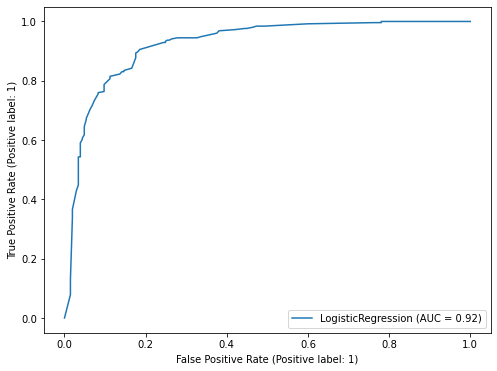

In [79]:
plot_roc_curve(log_reg_classifier, x_test_bd, y_test_bd)
